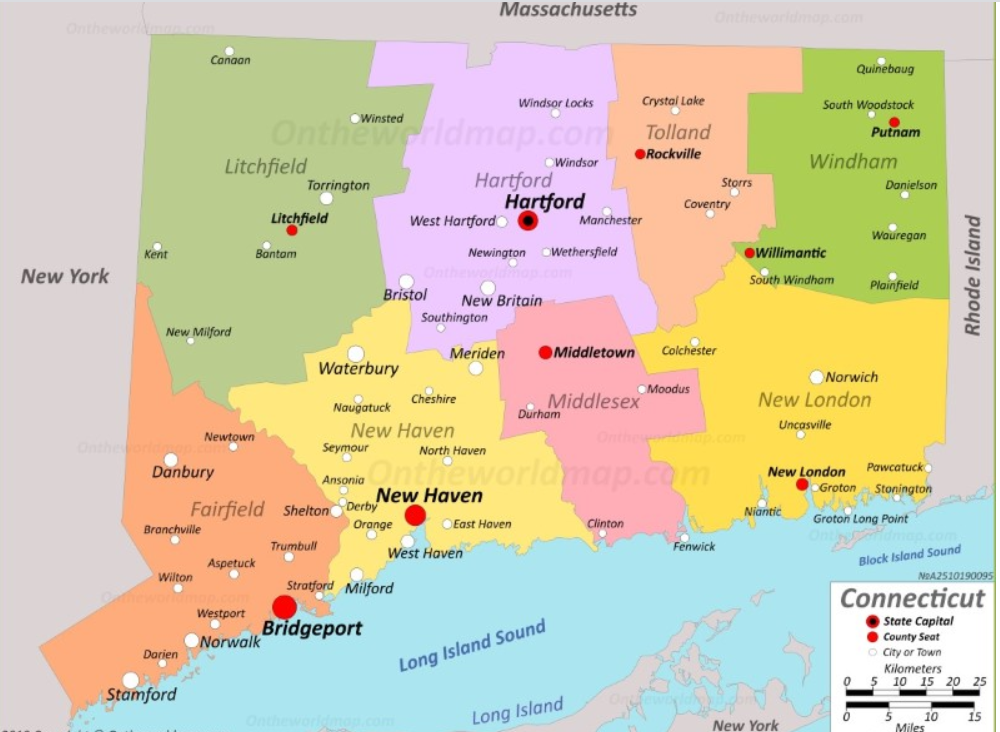

# Importing All The Required Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly 
import plotly.express as px
import plotly.graph_objects as go
import statsmodels.api as sm
import statsmodels.formula.api as smf
import datetime

In [2]:
import cufflinks as cf
import seaborn as sns
from plotly.subplots import make_subplots

## Importing the dataset

In [3]:
df=pd.read_csv(r"C:\Users\Ram\Presentation\deaths.csv",sep=",")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5105 entries, 0 to 5104
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5105 non-null   object 
 1   Date                 5103 non-null   object 
 2   DateType             5103 non-null   object 
 3   Age                  5102 non-null   float64
 4   Sex                  5099 non-null   object 
 5   Race                 5092 non-null   object 
 6   ResidenceCity        4932 non-null   object 
 7   ResidenceCounty      4308 non-null   object 
 8   ResidenceState       3556 non-null   object 
 9   DeathCity            5100 non-null   object 
 10  DeathCounty          4005 non-null   object 
 11  Location             5081 non-null   object 
 12  LocationifOther      590 non-null    object 
 13  DescriptionofInjury  4325 non-null   object 
 14  InjuryPlace          5039 non-null   object 
 15  InjuryCity           3349 non-null   o

In [4]:
df.dtypes

ID                      object
Date                    object
DateType                object
Age                    float64
Sex                     object
Race                    object
ResidenceCity           object
ResidenceCounty         object
ResidenceState          object
DeathCity               object
DeathCounty             object
Location                object
LocationifOther         object
DescriptionofInjury     object
InjuryPlace             object
InjuryCity              object
InjuryCounty            object
InjuryState             object
COD                     object
OtherSignifican         object
Heroin                  object
Cocaine                 object
Fentanyl                object
FentanylAnalogue        object
Oxycodone               object
Oxymorphone             object
Ethanol                 object
Hydrocodone             object
Benzodiazepine          object
Methadone               object
Amphet                  object
Tramad                  object
Morphine

In [5]:
df.head()

ID            Date      DateType   Age     Sex          Race  \
0  14-0273  6/28/2014 0:00  DateReported   NaN     NaN           NaN   
1  13-0102  3/21/2013 0:00   DateofDeath  48.0    Male         Black   
2  16-0165  3/13/2016 0:00   DateofDeath  30.0  Female         White   
3  16-0208  3/31/2016 0:00   DateofDeath  23.0    Male         White   
4  13-0052  2/13/2013 0:00   DateofDeath  22.0    Male  Asian, Other   

  ResidenceCity ResidenceCounty ResidenceState  DeathCity  ... Tramad  \
0           NaN             NaN            NaN        NaN  ...    NaN   
1       NORWALK             NaN            NaN    NORWALK  ...    NaN   
2    SANDY HOOK       FAIRFIELD             CT    DANBURY  ...    NaN   
3           RYE     WESTCHESTER             NY  GREENWICH  ...    NaN   
4      FLUSHING          QUEENS            NaN  GREENWICH  ...    NaN   

  Morphine_NotHeroin Hydromorphone Other OpiateNOS AnyOpioid MannerofDeath  \
0                NaN           NaN   NaN       NaN       NaN      Accident   
1                NaN           NaN   NaN       NaN       NaN      Accident   
2                NaN           NaN   NaN       NaN         Y      Accident   
3                NaN           NaN   NaN       NaN         Y      Accident   
4                NaN           NaN   NaN       NaN       NaN      Accident   

                             DeathCityGeo  \
0             CT\n(41.575155, -72.738288)   
1     Norwalk, CT\n(41.11805, -73.412906)   
2    Danbury, CT\n(41.393666, -73.451539)   
3  Greenwich, CT\n(41.026526, -73.628549)   
4  Greenwich, CT\n(41.026526, -73.628549)   

                          ResidenceCityGeo                InjuryCityGeo  
0              CT\n(41.575155, -72.738288)  CT\n(41.575155, -72.738288)  
1      NORWALK, CT\n(41.11805, -73.412906)  CT\n(41.575155, -72.738288)  
2  SANDY HOOK, CT\n(41.419998, -73.282501)                          NaN  
3                                      NaN                          NaN  
4                                      NaN  CT\n(41.575155, -72.738288)  

[5 rows x 41 columns]

In [6]:
df.tail()

ID              Date      DateType   Age   Sex   Race  \
5100  15-0466  09-08-2015 00:00  DateReported  43.0  Male  White   
5101  17-0618    7/22/2017 0:00  DateReported  21.0  Male  White   
5102  18-0646    8/14/2018 0:00   DateofDeath  30.0  Male  White   
5103  14-0124    3/16/2014 0:00   DateofDeath  33.0  Male  White   
5104  16-0637    9/15/2016 0:00   DateofDeath  33.0  Male  White   

      ResidenceCity ResidenceCounty ResidenceState  DeathCity  ... Tramad  \
5100       CHESHIRE       NEW HAVEN             CT   CHESHIRE  ...    NaN   
5101        MADISON       NEW HAVEN             CT  NEW HAVEN  ...    NaN   
5102  LAWRENCEVILLE           TIOGA             PA    DANBURY  ...      Y   
5103       HARTFORD             NaN            NaN    WINDSOR  ...    NaN   
5104      THOMASTON      LITCHFIELD             CT  WATERBURY  ...    NaN   

     Morphine_NotHeroin Hydromorphone Other OpiateNOS AnyOpioid MannerofDeath  \
5100                NaN           NaN   NaN       NaN       NaN      Accident   
5101                NaN           NaN   NaN       NaN       NaN      Accident   
5102                NaN           NaN   NaN       NaN         Y      Accident   
5103                NaN           NaN   NaN       NaN       NaN      Accident   
5104                NaN           NaN   NaN       NaN         Y      Accident   

                                DeathCityGeo  \
5100   CHESHIRE, CT\n(41.498834, -72.901448)   
5101  New Haven, CT\n(41.308252, -72.924161)   
5102    DANBURY, CT\n(41.393666, -73.451539)   
5103     WINDSOR, CT\n(41.852781, -72.64379)   
5104  WATERBURY, CT\n(41.554261, -73.043069)   

                            ResidenceCityGeo  \
5100   CHESHIRE, CT\n(41.498834, -72.901448)   
5101     MADISON, CT\n(41.271447, -72.60086)   
5102                                     NaN   
5103   HARTFORD, CT\n(41.765775, -72.673356)   
5104  THOMASTON, CT\n(41.674124, -73.073189)   

                                   InjuryCityGeo  
5100                 CT\n(41.575155, -72.738288)  
5101                 CT\n(41.575155, -72.738288)  
5102        DANBURY, CT\n(41.393666, -73.451539)  
5103                 CT\n(41.575155, -72.738288)  
5104  WATERBURY, CT, CT\n(41.554261, -73.043069)  

[5 rows x 41 columns]

In [ ]:
MannerofDeath

In [7]:
df.columns

Index(['ID', 'Date', 'DateType', 'Age', 'Sex', 'Race', 'ResidenceCity',
       'ResidenceCounty', 'ResidenceState', 'DeathCity', 'DeathCounty',
       'Location', 'LocationifOther', 'DescriptionofInjury', 'InjuryPlace',
       'InjuryCity', 'InjuryCounty', 'InjuryState', 'COD', 'OtherSignifican',
       'Heroin', 'Cocaine', 'Fentanyl', 'FentanylAnalogue', 'Oxycodone',
       'Oxymorphone', 'Ethanol', 'Hydrocodone', 'Benzodiazepine', 'Methadone',
       'Amphet', 'Tramad', 'Morphine_NotHeroin', 'Hydromorphone', 'Other',
       'OpiateNOS', 'AnyOpioid', 'MannerofDeath', 'DeathCityGeo',
       'ResidenceCityGeo', 'InjuryCityGeo'],
      dtype='object')

In [8]:
df.isnull().sum()

ID                        0
Date                      2
DateType                  2
Age                       3
Sex                       6
Race                     13
ResidenceCity           173
ResidenceCounty         797
ResidenceState         1549
DeathCity                 5
DeathCounty            1100
Location                 24
LocationifOther        4515
DescriptionofInjury     780
InjuryPlace              66
InjuryCity             1756
InjuryCounty           2741
InjuryState            3681
COD                       0
OtherSignifican        4936
Heroin                 2576
Cocaine                3584
Fentanyl               2873
FentanylAnalogue       4716
Oxycodone              4498
Oxymorphone            4997
Ethanol                3858
Hydrocodone            4987
Benzodiazepine         3762
Methadone              4631
Amphet                 4946
Tramad                 4975
Morphine_NotHeroin     5063
Hydromorphone          5080
Other                  4670
OpiateNOS           

# DATA Pre-Processing

In [9]:
df.drop(labels="ID",axis=1,inplace=True) #removing id

In [10]:
print("No of Unique values in cause of Death: ",df.COD.nunique()) 

No of Unique values in cause of Death:  3193


In [11]:
df['Sex'] = df.Sex.map(lambda x : 1 if x == 'Female' else 0) #mapping 0-Male & 1-Female


In [12]:
df["Morphine_NotHeroin"].nunique()

5

In [13]:
df["Morphine_NotHeroin"].value_counts()

Y                   38
STOLE MEDS           1
YES                  1
NO RX BUT STRAWS     1
PCP NEG              1
Name: Morphine_NotHeroin, dtype: int64

In [14]:
df['Morphine_NotHeroin'] = df['Morphine_NotHeroin'].str.replace('YES','Y')


In [15]:
df["Age"].isnull().value_counts()

False    5102
True        3
Name: Age, dtype: int64

In [16]:
df.dropna(subset=["Age","Sex","Date","DateType"], how='any', inplace=True)

In [17]:
df['Female'] = df.Sex.map(lambda x : 1 if x == 'Female' else 0)


In [18]:
Sex= pd.Series(np.where(df.Female==1,'Female','Male'))
Sex

0       Male
1       Male
2       Male
3       Male
4       Male
        ... 
5096    Male
5097    Male
5098    Male
5099    Male
5100    Male
Length: 5101, dtype: object

In [19]:
race_vars = {'Black': ['Black'],   'White': ['White'], 
         'Asian': ['Asian, Other', 'Asian Indian', 'Chinese'], 
         'Hispanic':  ['Hispanic, White', 'Hispanic, Black'], 
         'AllOthers': ['Unknown', 'Other', 'Native American, Other', 'Hawaiian']}

In [20]:
for race in race_vars.keys():
    df[race] = df.Race.map(lambda x: 1 if x in race_vars[race] else 0)

In [21]:
df["Race"]

1              Black
2              White
3              White
4       Asian, Other
5              White
            ...     
5100           White
5101           White
5102           White
5103           White
5104           White
Name: Race, Length: 5101, dtype: object

In [22]:
df.drop(["DeathCity","ResidenceCityGeo","InjuryCityGeo"],axis=1,inplace=True) #removing Geo columns

# EDA - 1

In [23]:
df.describe()

Age          Sex  Female        Black        White  \
count  5101.000000  5101.000000  5101.0  5101.000000  5101.000000   
mean     41.967653     0.259753     0.0     0.084885     0.784748   
std      12.336298     0.438542     0.0     0.278738     0.411037   
min      14.000000     0.000000     0.0     0.000000     0.000000   
25%      32.000000     0.000000     0.0     0.000000     1.000000   
50%      42.000000     0.000000     0.0     0.000000     1.000000   
75%      52.000000     1.000000     0.0     0.000000     1.000000   
max      87.000000     1.000000     0.0     1.000000     1.000000   

             Asian     Hispanic    AllOthers  
count  5101.000000  5101.000000  5101.000000  
mean      0.006665     0.114683     0.007057  
std       0.081377     0.318671     0.083720  
min       0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000  
75%       0.000000     0.000000     0.000000  
max       1.000000     1.000000     1.000000

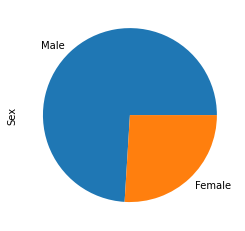

In [24]:
a=pd.Series(df["Sex"])
a.value_counts().plot(kind="pie",labels={"Male","Female"})
plt.show()

In [25]:
sns.set(rc={'figure.figsize':(10,8)}) #setting the canvas 

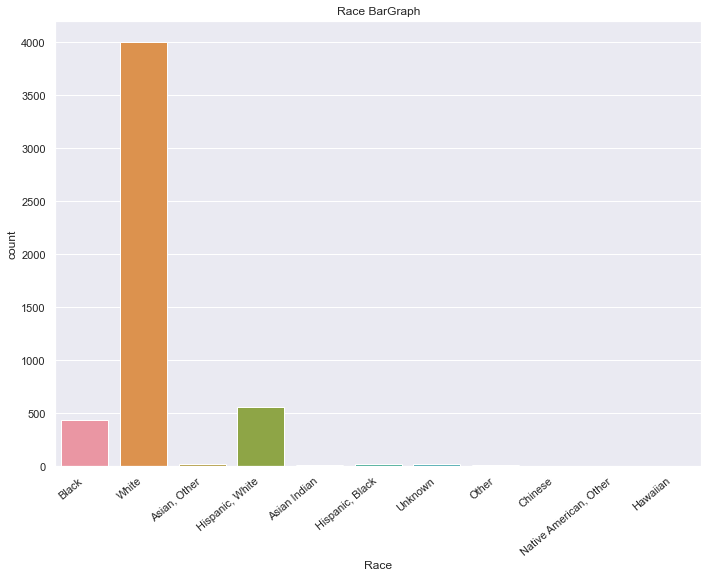

In [65]:
a=sns.countplot(x=df["Race"],data=df)
a.set_xticklabels(a.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.title("Race BarGraph")
plt.show()

In [27]:
print("No of Unique values in Race:",df["Race"].nunique())
df["Race"].value_counts()

No of Unique values in Race: 11


White                     4003
Hispanic, White            561
Black                      433
Hispanic, Black             24
Unknown                     23
Asian, Other                18
Asian Indian                14
Other                       11
Chinese                      2
Hawaiian                     1
Native American, Other       1
Name: Race, dtype: int64

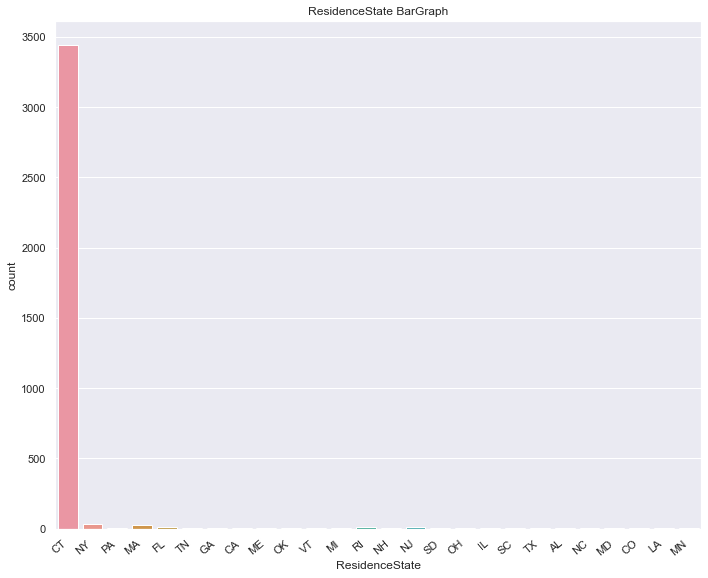

In [28]:
b=sns.countplot(x=df["ResidenceState"],data=df)
b.set_xticklabels(b.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.title("ResidenceState BarGraph")
plt.show()

In [29]:
print("No of Unique values in ResidenceState:",df["ResidenceState"].nunique())
print("Top 3 Residence States")
df["ResidenceState"].value_counts()[[0,1,2]]

No of Unique values in ResidenceState: 26
Top 3 Residence States


CT    3442
NY      29
MA      23
Name: ResidenceState, dtype: int64

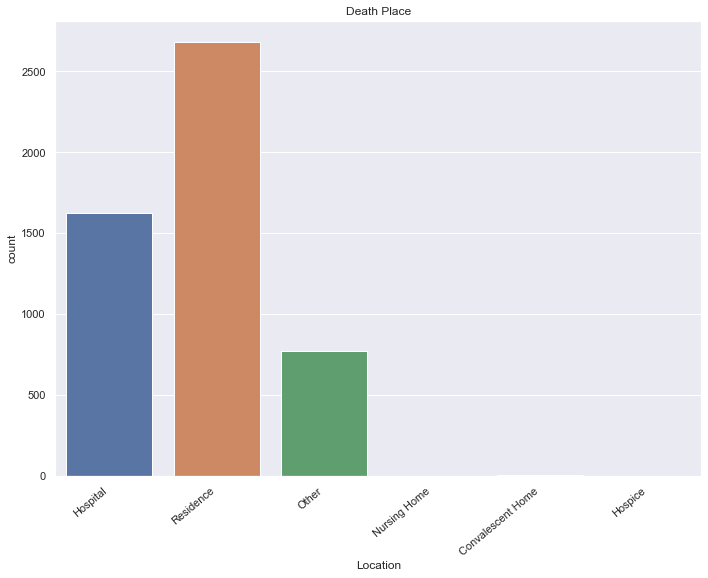

In [30]:
b=sns.countplot(x=df["Location"],data=df)
b.set_xticklabels(b.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.title("Death Place")
plt.show()

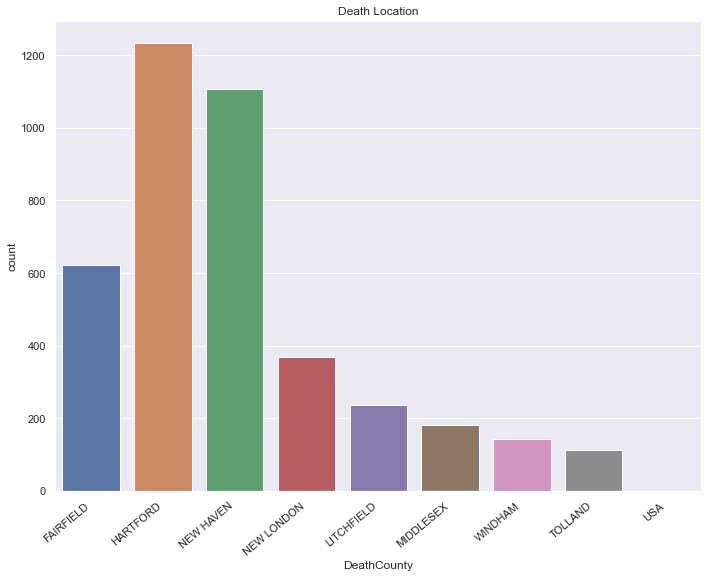

In [31]:
d=sns.countplot(x=df["DeathCounty"],data=df)
d.set_xticklabels(d.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.title("Death Location")
plt.show()

# EDA 2

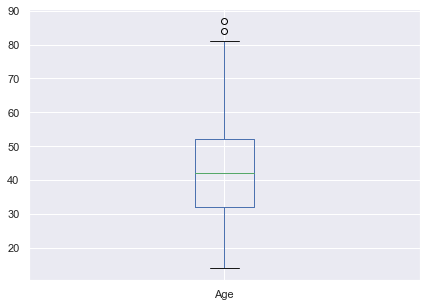

In [32]:
df["Age"].plot(kind="box",figsize=(7,5))

In [33]:
print("No of Unique values in DeathLocation:",df["Location"].nunique())


No of Unique values in DeathLocation: 6


In [34]:
df["Location"].value_counts()

Residence            2677
Hospital             1626
Other                 773
Convalescent Home       3
Hospice                 1
Nursing Home            1
Name: Location, dtype: int64

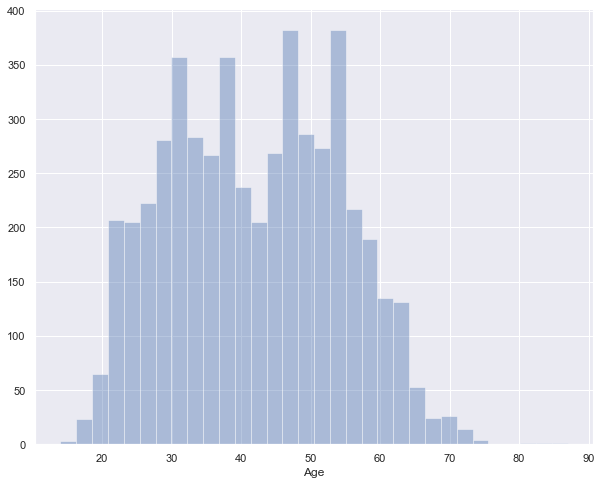

In [35]:
sns.distplot(df["Age"],kde=False)

In [36]:
for drug in df.columns[20:36]:
    df[drug] = df[drug].map(lambda x : 1 if x == 'Y' else 0)

In [37]:
df['NumDrugs'] = df.iloc[:,20:36].values.sum(1)
df['NumDrugs'] = df['NumDrugs'].map(lambda x: 1 if x == 0 else x)
df['NumDrugs']

1       1
2       1
3       2
4       1
5       1
       ..
5100    2
5101    1
5102    4
5103    1
5104    1
Name: NumDrugs, Length: 5101, dtype: int64

In [38]:
df["NumDrugs"].value_counts()

1    2028
2    1563
3    1069
4     362
5      71
6       8
Name: NumDrugs, dtype: int64

In [39]:
fig = px.pie(df, values='NumDrugs',names='NumDrugs',title="Num of Drugs Consumed in Percentage",opacity=0.9)
fig.show()

In [40]:
df["Morphine_NotHeroin"].value_counts()

0    5062
1      39
Name: Morphine_NotHeroin, dtype: int64

In [41]:
df["Morphine_NotHeroin"].value_counts()
print("Number of People Who used Morphine with Prescription is:  ",df["Morphine_NotHeroin"].value_counts()[1])
print("Number of People Who used Morphine/Heroine illegally is:  ",df["Morphine_NotHeroin"].value_counts()[0])
#1-YES #2-No

Number of People Who used Morphine with Prescription is:   39
Number of People Who used Morphine/Heroine illegally is:   5062


In [42]:
df['year'] = pd.DatetimeIndex(df['Date']).year #extracting date from the dataframe


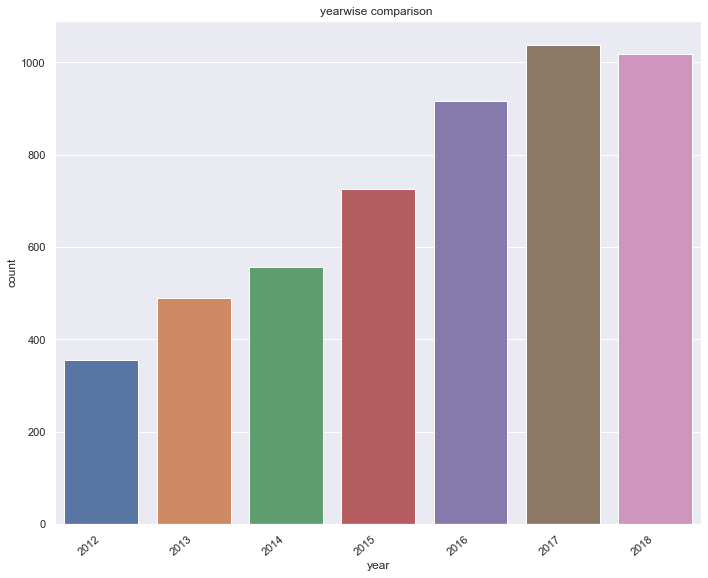

In [43]:
b=sns.countplot(x=df["year"],data=df)
b.set_xticklabels(b.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.title("yearwise comparison ")
plt.show()

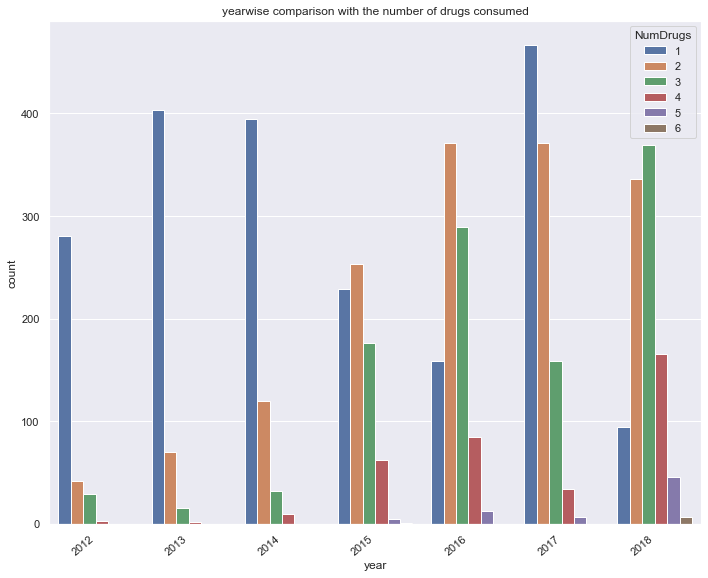

In [44]:
b=sns.countplot(x=df["year"],data=df,hue=df["NumDrugs"])
b.set_xticklabels(b.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.title("yearwise comparison with the number of drugs consumed")
plt.show()

In [45]:
cod=df["COD"].value_counts()[[i for i in range(10)]]

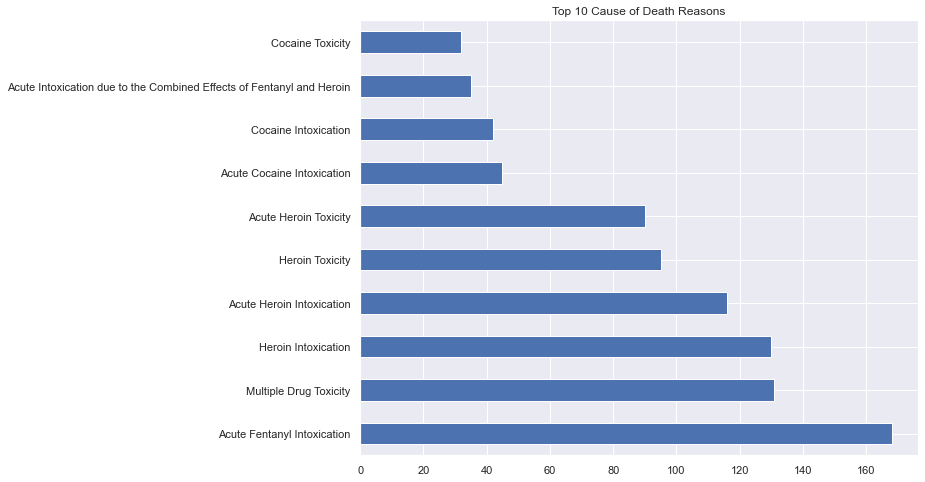

In [46]:
cod.plot(kind="barh")
plt.title("Top 10 Cause of Death Reasons")
plt.show()

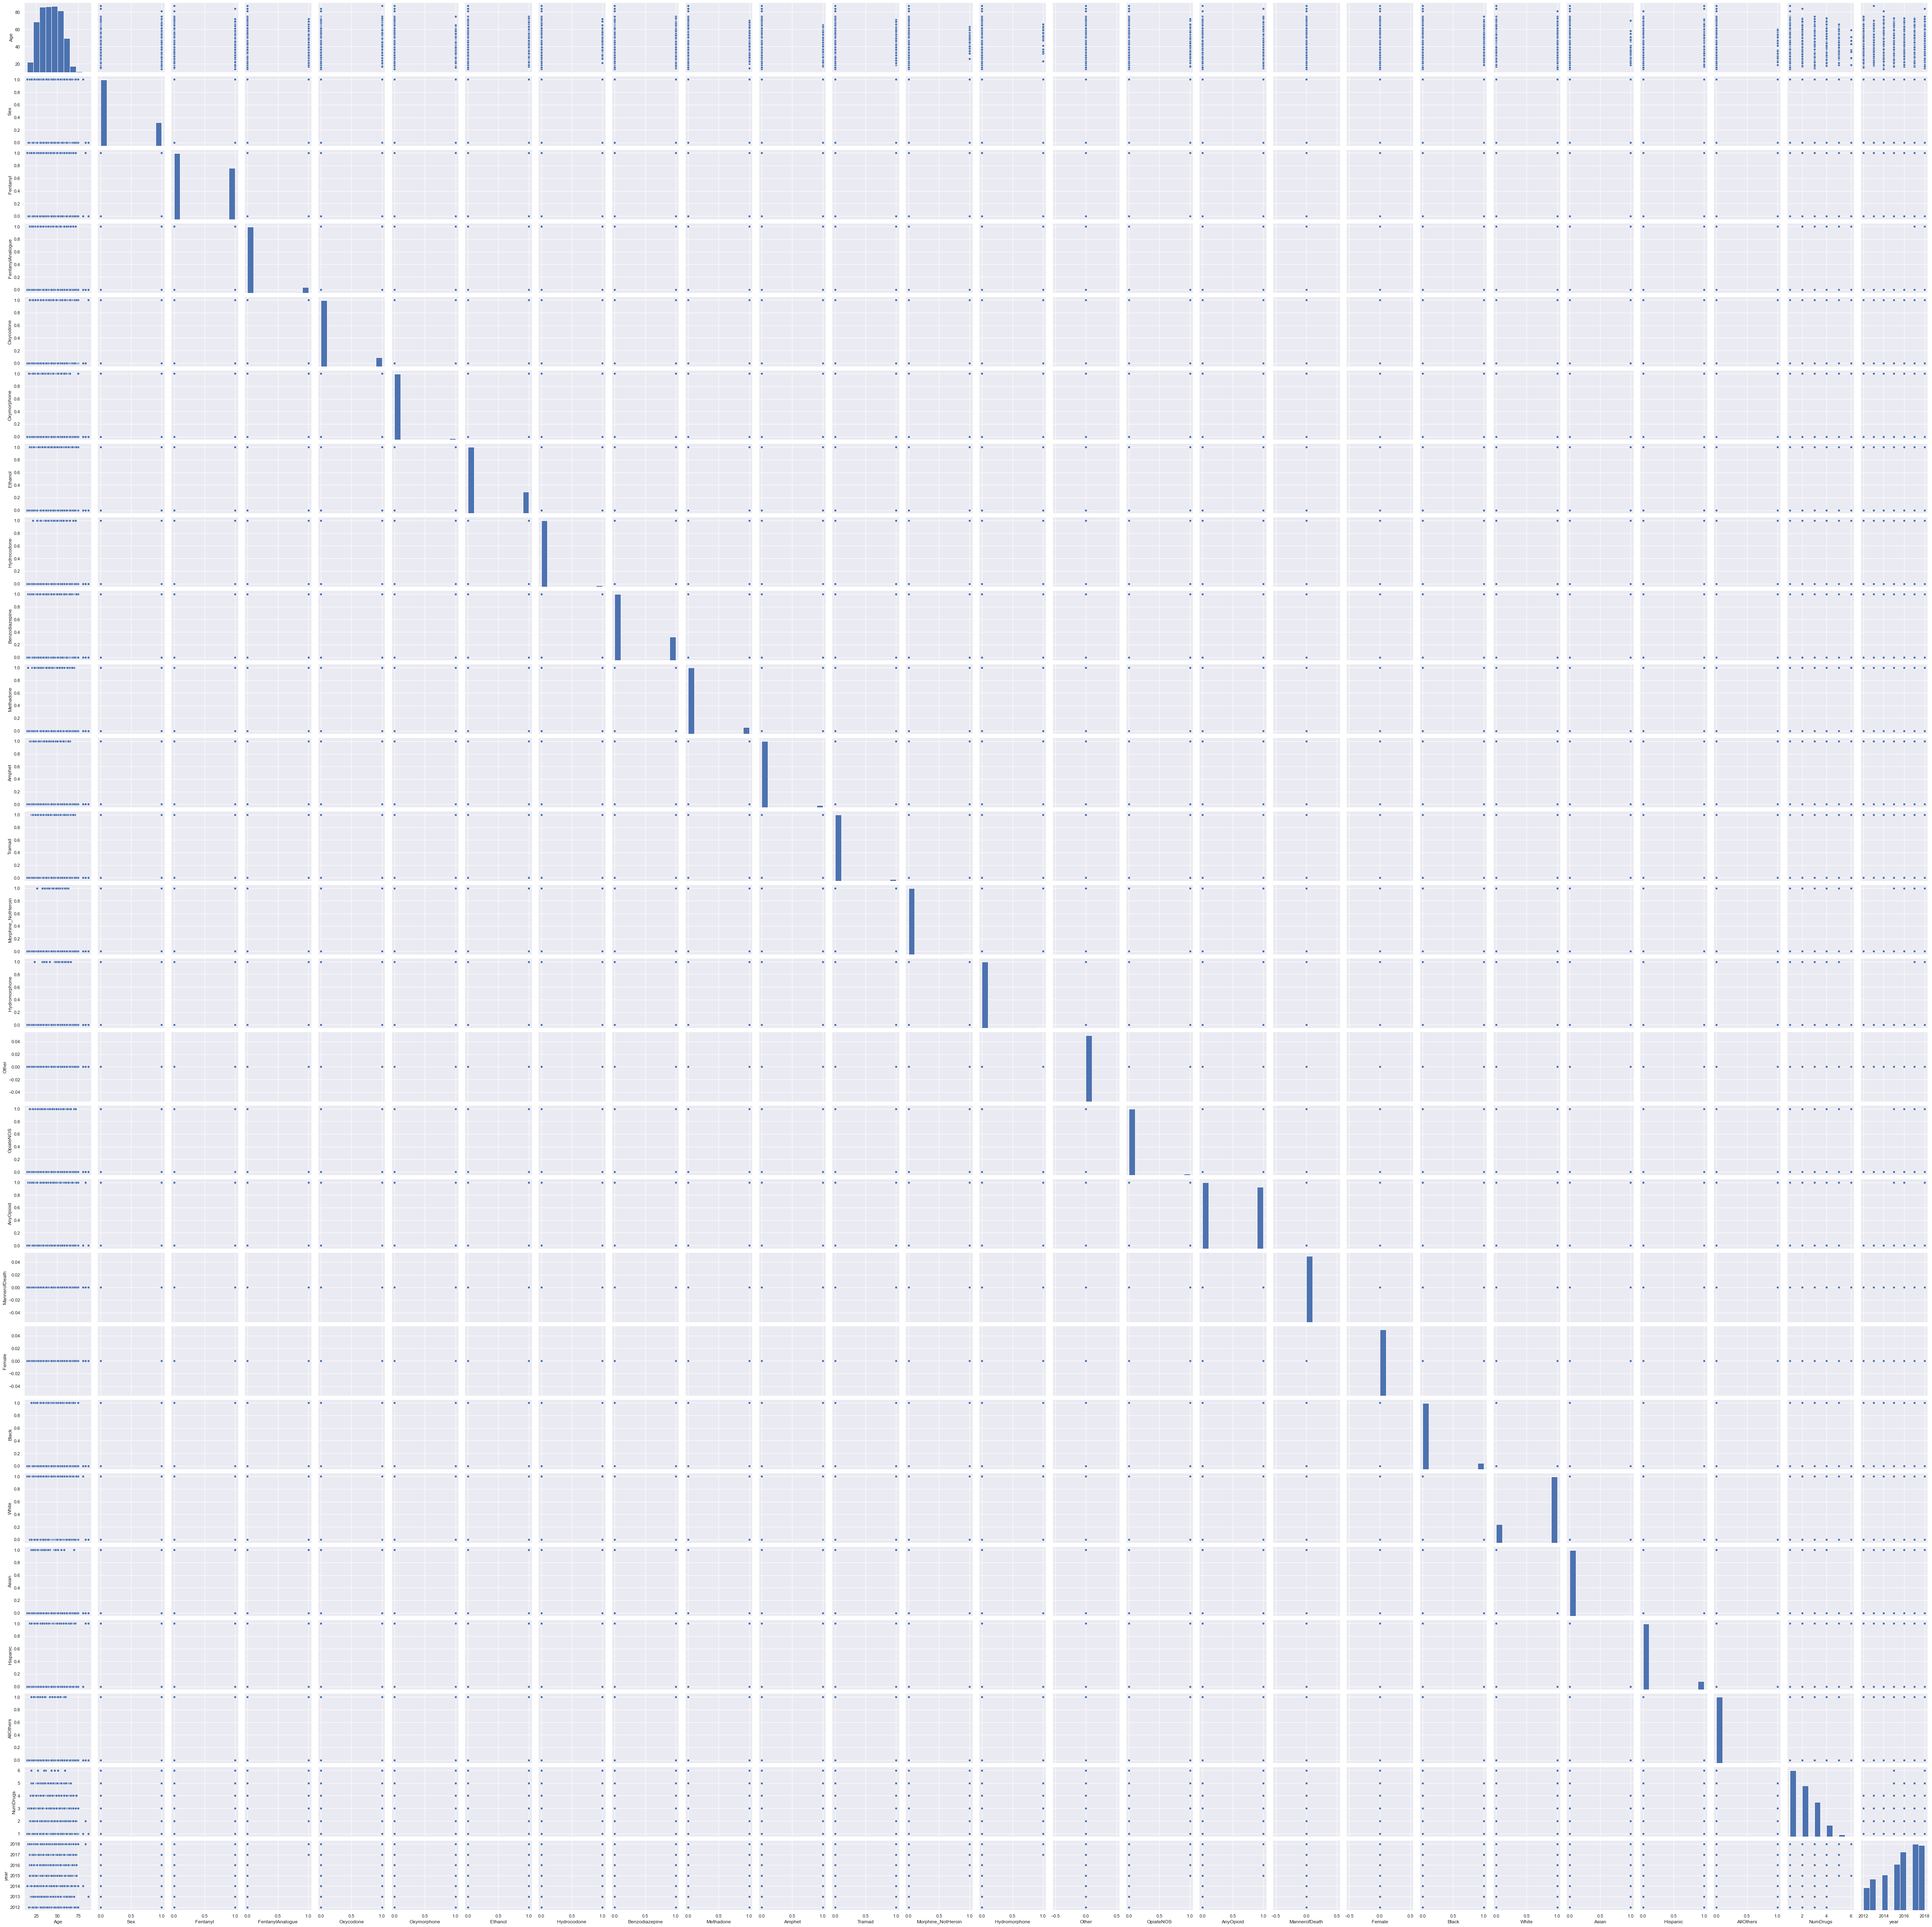

In [47]:
sns.pairplot(df)

In [47]:
ygrp=df.groupby(df["year"])

In [48]:
ygrp.first()

Date      DateType   Age  Sex   Race  ResidenceCity  \
year                                                                    
2012  08-12-2012 00:00   DateofDeath  21.0    1  White  WEST HARTFORD   
2013    3/21/2013 0:00   DateofDeath  48.0    0  Black        NORWALK   
2014    6/29/2014 0:00   DateofDeath  23.0    0  White        BRISTOL   
2015  07-05-2015 00:00  DateReported  49.0    1  White        DANBURY   
2016    3/13/2016 0:00   DateofDeath  30.0    1  White     SANDY HOOK   
2017   10/13/2017 0:00  DateReported  25.0    0  White        MERIDEN   
2018  02-10-2018 00:00  DateReported  51.0    0  White       HARTFORD   

     ResidenceCounty ResidenceState DeathCounty   Location  ... MannerofDeath  \
year                                                        ...                 
2012        HARTFORD            NaN    HARTFORD  Residence  ...             0   
2013          QUEENS            NaN   FAIRFIELD   Hospital  ...             0   
2014             NaN            NaN    HARTFORD  Residence  ...             0   
2015       FAIRFIELD             CT   NEW HAVEN   Hospital  ...             0   
2016       FAIRFIELD             CT         NaN   Hospital  ...             0   
2017       NEW HAVEN             CT   NEW HAVEN   Hospital  ...             0   
2018        HARTFORD             CT    HARTFORD   Hospital  ...             0   

                                    DeathCityGeo Female Black White Asian  \
year                                                                        
2012  WEST HARTFORD, CT\n(41.762008, -72.741807)      0     0     1     0   
2013         Norwalk, CT\n(41.11805, -73.412906)      0     1     0     0   
2014        BRISTOL, CT\n(41.673037, -72.945791)      0     0     1     0   
2015      New Haven, CT\n(41.308252, -72.924161)      0     0     1     0   
2016        Danbury, CT\n(41.393666, -73.451539)      0     0     1     0   
2017          Meriden, CT\n(41.537589, -72.8011)      0     0     1     0   
2018       Hartford, CT\n(41.765775, -72.673356)      0     0     1     0   

     Hispanic AllOthers NumDrugs  year  
year                                    
2012        0         0        1  2012  
2013        0         0        1  2013  
2014        0         0        1  2014  
2015        0         0        2  2015  
2016        0         0        1  2016  
2017        0         0        2  2017  
2018        0         0        4  2018  

[7 rows x 45 columns]

In [49]:
ygrp.count()

Date  DateType   Age   Sex  Race  ResidenceCity  ResidenceCounty  \
year                                                                     
2012   355       355   355   355   355            350              334   
2013   490       490   490   490   490            477              460   
2014   557       557   557   557   555            538                0   
2015   726       726   726   726   726            700              688   
2016   917       917   917   917   913            889              884   
2017  1038      1038  1038  1038  1036            996              969   
2018  1018      1018  1018  1018  1016            982              973   

      ResidenceState  DeathCounty  Location  ...  MannerofDeath  DeathCityGeo  \
year                                         ...                                
2012               0          352       354  ...            355           355   
2013               0          488       485  ...            490           490   
2014               0          408       553  ...            557           557   
2015             699          719       721  ...            726           726   
2016             889            0       913  ...            917           917   
2017             988         1025      1037  ...           1038          1038   
2018             980         1013      1018  ...           1018          1018   

      Female  Black  White  Asian  Hispanic  AllOthers  NumDrugs  year  
year                                                                    
2012     355    355    355    355       355        355       355   355  
2013     490    490    490    490       490        490       490   490  
2014     557    557    557    557       557        557       557   557  
2015     726    726    726    726       726        726       726   726  
2016     917    917    917    917       917        917       917   917  
2017    1038   1038   1038   1038      1038       1038      1038  1038  
2018    1018   1018   1018   1018      1018       1018      1018  1018  

[7 rows x 45 columns]

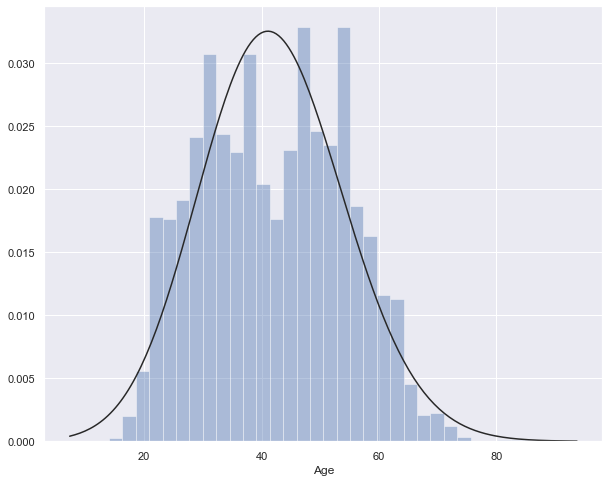

In [50]:
from scipy import stats
sns.distplot(df["Age"], kde=False, fit=stats.gamma);

In [51]:
x=df["ResidenceCity"].value_counts()[[i for i in range(10)]]

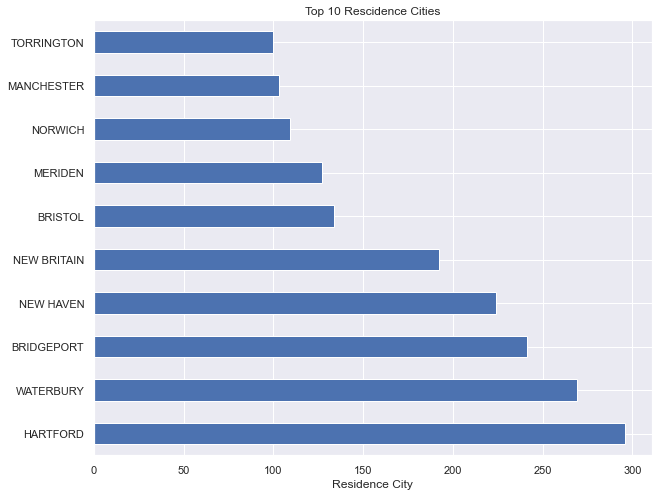

In [52]:
x.plot(kind="barh")
plt.title("Top 10 Rescidence Cities")
plt.xlabel("Residence City")
plt.show()

# Finding Relationship using Age Variable

In [53]:
r1 = smf.ols('Age~Female+Black+Asian+Hispanic+AllOthers+Cocaine+Fentanyl+FentanylAnalogue+Oxycodone+Oxymorphone+Ethanol+Hydrocodone+Benzodiazepine+Methadone+Amphet+Tramad+Morphine_NotHeroin+Hydromorphone+OpiateNOS', data=df).fit()
r2 = smf.ols('Age~Female+Black+Asian+Hispanic+AllOthers+Black*Female+Asian*Female+Hispanic*Female+AllOthers*Female+Cocaine+Fentanyl+FentanylAnalogue+Oxycodone+Oxymorphone+Ethanol+Hydrocodone+Benzodiazepine+Methadone+Amphet+Tramad+Morphine_NotHeroin+Hydromorphone+OpiateNOS', data=df).fit()

In [54]:
r1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     7.057
Date:                Fri, 11 Sep 2020   Prob (F-statistic):           8.91e-17
Time:                        08:18:31   Log-Likelihood:                -5818.4
No. Observations:                1520   AIC:                         1.167e+04
Df Residuals:                    1502   BIC:                         1.177e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             43.0963      0.509     84.615      0.000      42.097      44.095
Female             -2.479e-15   3.35e-15     -0.740      0.459   -9.05e-15    4.09e-15
Black                  6.0827      0.820      7.420      0.000       4.475       7.691
Asian                 -3.8530      3.398     -1.134      0.257     -10.519       2.813
Hispanic               0.4280      0.853      0.502      0.616      -1.246       2.102
AllOthers              2.3897      3.292      0.726      0.468      -4.067       8.846
Fentanyl              -3.7767      0.623     -6.063      0.000      -4.999      -2.555
FentanylAnalogue       0.4267      1.061      0.402      0.688      -1.654       2.508
Oxycodone              0.1708      1.264      0.135      0.892      -2.308       2.650
Oxymorphone           -0.0160      3.529     -0.005      0.996      -6.938       6.906
Ethanol                1.1489      0.705      1.630      0.103      -0.234       2.532
Hydrocodone            4.8449      3.027      1.601      0.110      -1.092      10.782
Benzodiazepine         0.6201      0.787      0.788      0.431      -0.924       2.165
Methadone              0.4594      1.174      0.391      0.696      -1.843       2.762
Amphet                -1.5492      1.659     -0.934      0.350      -4.803       1.704
Tramad                 4.4894      2.313      1.941      0.052      -0.048       9.026
Morphine_NotHeroin     3.0131      6.604      0.456      0.648      -9.940      15.966
Hydromorphone          2.3977      5.678      0.422      0.673      -8.740      13.535
OpiateNOS             -4.3289      3.818     -1.134      0.257     -11.818       3.160
==============================================================================
Omnibus:                       54.779   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.902
Skew:                           0.000   Prob(JB):                     3.91e-06
Kurtosis:                       2.373   Cond. No.                     8.41e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.05e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [55]:
r2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     7.057
Date:                Fri, 11 Sep 2020   Prob (F-statistic):           8.91e-17
Time:                        08:18:31   Log-Likelihood:                -5818.4
No. Observations:                1520   AIC:                         1.167e+04
Df Residuals:                    1502   BIC:                         1.177e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             43.0963      0.509     84.615      0.000      42.097      44.095
Female              7.469e-15   2.35e-15      3.174      0.002    2.85e-15    1.21e-14
Black                  6.0827      0.820      7.420      0.000       4.475       7.691
Asian                 -3.8530      3.398     -1.134      0.257     -10.519       2.813
Hispanic               0.4280      0.853      0.502      0.616      -1.246       2.102
AllOthers              2.3897      3.292      0.726      0.468      -4.067       8.846
Black:Female        -2.77e-15   1.97e-15     -1.407      0.160   -6.63e-15    1.09e-15
Asian:Female        3.675e-16   2.55e-15      0.144      0.885   -4.62e-15    5.36e-15
Hispanic:Female     1.717e-15   1.46e-15      1.180      0.238   -1.14e-15    4.57e-15
AllOthers:Female    1.845e-15   1.89e-15      0.974      0.330   -1.87e-15    5.56e-15
Fentanyl              -3.7767      0.623     -6.063      0.000      -4.999      -2.555
FentanylAnalogue       0.4267      1.061      0.402      0.688      -1.654       2.508
Oxycodone              0.1708      1.264      0.135      0.892      -2.308       2.650
Oxymorphone           -0.0160      3.529     -0.005      0.996      -6.938       6.906
Ethanol                1.1489      0.705      1.630      0.103      -0.234       2.532
Hydrocodone            4.8449      3.027      1.601      0.110      -1.092      10.782
Benzodiazepine         0.6201      0.787      0.788      0.431      -0.924       2.165
Methadone              0.4594      1.174      0.391      0.696      -1.843       2.762
Amphet                -1.5492      1.659     -0.934      0.350      -4.803       1.704
Tramad                 4.4894      2.313      1.941      0.052      -0.048       9.026
Morphine_NotHeroin     3.0131      6.604      0.456      0.648      -9.940      15.966
Hydromorphone          2.3977      5.678      0.422      0.673      -8.740      13.535
OpiateNOS             -4.3289      3.818     -1.134      0.257     -11.818       3.160
==============================================================================
Omnibus:                       54.779   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.902
Skew:                           0.000   Prob(JB):                     3.91e-06
Kurtosis:                       2.373   Cond. No.                     2.21e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.4e-34. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [56]:
r3 = smf.ols('NumDrugs~Age+np.power(Age,2)+Female+Black+Asian+Hispanic+AllOthers', data=df).fit()
r4 = smf.ols('NumDrugs~Age+np.power(Age,2)+Female+Black+Asian+Hispanic+AllOthers + Black*Female+Asian*Female+Hispanic*Female+AllOthers*Female', data=df).fit()

In [57]:
r3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               NumDrugs   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     11.97
Date:                Fri, 11 Sep 2020   Prob (F-statistic):           2.17e-13
Time:                        08:18:32   Log-Likelihood:                -7305.7
No. Observations:                5101   AIC:                         1.463e+04
Df Residuals:                    5094   BIC:                         1.467e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.3880      0.155      8.979      0.000       1.085       1.691
Age                  0.0249      0.008      3.284      0.001       0.010       0.040
np.power(Age, 2)    -0.0002    8.8e-05     -2.330      0.020      -0.000   -3.25e-05
Female            9.689e-17   8.98e-17      1.078      0.281   -7.92e-17    2.73e-16
Black               -0.2422      0.052     -4.690      0.000      -0.343      -0.141
Asian               -0.0335      0.175     -0.192      0.848      -0.376       0.309
Hispanic            -0.1641      0.045     -3.651      0.000      -0.252      -0.076
AllOthers            0.0910      0.170      0.536      0.592      -0.242       0.424
==============================================================================
Omnibus:                      412.195   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              519.760
Skew:                           0.782   Prob(JB):                    1.37e-113
Kurtosis:                       3.029   Cond. No.                     1.95e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.42e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [58]:
r4.summary()

D:\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1830: RuntimeWarning:

divide by zero encountered in double_scalars

D:\Anaconda\lib\site-packages\statsmodels\base\model.py:1362: RuntimeWarning:

invalid value encountered in true_divide

D:\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning:

invalid value encountered in less_equal



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               NumDrugs   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     11.97
Date:                Fri, 11 Sep 2020   Prob (F-statistic):           2.17e-13
Time:                        08:18:32   Log-Likelihood:                -7305.7
No. Observations:                5101   AIC:                         1.463e+04
Df Residuals:                    5094   BIC:                         1.467e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.3880      0.155      8.979      0.000       1.085       1.691
Age                  0.0249      0.008      3.284      0.001       0.010       0.040
np.power(Age, 2)    -0.0002    8.8e-05     -2.330      0.020      -0.000   -3.25e-05
Female           -1.394e-16   3.88e-16     -0.359      0.719      -9e-16    6.21e-16
Black               -0.2422      0.052     -4.690      0.000      -0.343      -0.141
Asian               -0.0335      0.175     -0.192      0.848      -0.376       0.309
Hispanic            -0.1641      0.045     -3.651      0.000      -0.252      -0.076
AllOthers            0.0910      0.170      0.536      0.592      -0.242       0.424
Black:Female              0          0        nan        nan           0           0
Asian:Female              0          0        nan        nan           0           0
Hispanic:Female           0          0        nan        nan           0           0
AllOthers:Female          0          0        nan        nan           0           0
==============================================================================
Omnibus:                      412.195   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              519.760
Skew:                           0.782   Prob(JB):                    1.37e-113
Kurtosis:                       3.029   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [59]:
d_ls = {
    'Hydromorphone':      6.8416 + 2.4563,  'Tramad':             6.6210 + 2.4563,
    'Hydrocodone':        5.3814 + 2.4563,  'Morphine_NotHeroin': 4.3465 + 2.4563,
    'Oxycodone':          4.1510 + 2.4563,  'Methadone':          2.7350 + 2.4563,
    'Ethanol':            2.4437 + 2.4563,  'Cocaine':            1.7345 + 2.4563,
    'Benzodiazepine':     1.3855 + 2.4563,  'Heroin':             0.0000 + 2.4563,
    'Fentanyl':          -2.1084 + 2.4563,  'Amphet':            -2.4563 + 2.4563
}

p_od = {}
tot = len(df)
for drug in d_ls.keys(): 
    p_od[drug] = 100 * len(df.query(drug + ' == 1')) / tot

In [60]:
d_ls

{'Hydromorphone': 9.2979,
 'Tramad': 9.077300000000001,
 'Hydrocodone': 7.8377,
 'Morphine_NotHeroin': 6.8027999999999995,
 'Oxycodone': 6.6073,
 'Methadone': 5.1913,
 'Ethanol': 4.9,
 'Cocaine': 4.1908,
 'Benzodiazepine': 3.8418,
 'Heroin': 2.4563,
 'Fentanyl': 0.3479000000000001,
 'Amphet': 0.0}

In [61]:
f4 = go.Figure(
    data=[
        go.Bar(name='D Lifespan', x=list(d_ls.keys()), y=list(d_ls.values()), yaxis='y', offsetgroup=1),
        go.Bar(name='% of ODs',   x=list(p_od.keys()), y=list(p_od.values()), yaxis='y2', offsetgroup=2)
    ],
    layout={
        'yaxis': {'title': 'Change in Lifespan'},
        'yaxis2': {'title': 'Percent of Overdoses', 'overlaying': 'y', 'side': 'right'}
    }
)

# Change the bar mode
f4.update_layout(title='Figure 4 - Drugs by Age at Death and Involvement in Overdoses', 
                  width=800, height=400, barmode='group')

In [62]:
x = np.arange(10, 80)
f5 = go.Figure(data=go.Scatter(x=x, y=r3.params[2]*x**2+r3.params[1]*x+r3.params[0]))

f5.update_layout(title='Expected Number of Drugs by Age of Overdose Victim', 
                 xaxis_title='Age of Victim', yaxis_title='Expected Number of drugs',
                  width=600, height=400, barmode='group')

In [63]:
print('% of victims below turning point in sample: ', round(100*len(df.query('Age > 45.8')) / len(df), 1))

% of victims below turning point in sample:  41.5
